In [65]:
import h2o
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv('TOTALNSA.csv', index_col='DATE', parse_dates=True)
df.index.freq='MS'
df.rename(inplace=True, columns={"TOTALNSA":"data"})
df = df.loc['20100101':'20191231']

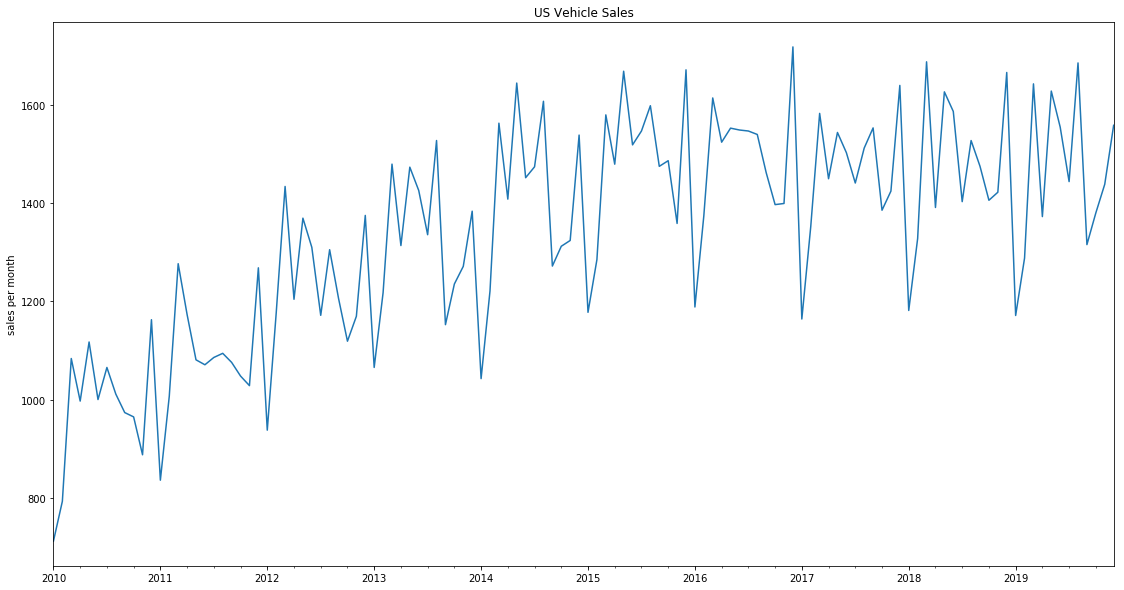

In [67]:
title='US Vehicle Sales'
ylabel='sales per month'
xlabel=''
ax=df.data.plot(figsize=(19,10), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

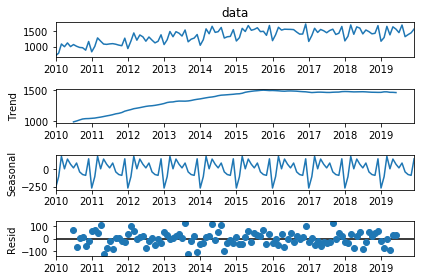

In [68]:
result_sd = seasonal_decompose(df.data)
result_sd.plot();

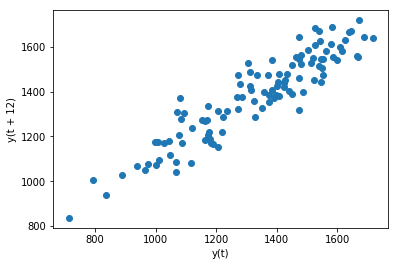

In [69]:
from pandas.plotting import lag_plot
lag_plot(df.data, lag=12)

In [70]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,34 mins 53 secs
H2O_cluster_timezone:,Europe/Belgrade
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_Tsar_fxcqmv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4.750 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [71]:
df1 = df.copy()

In [72]:
df1['lag12']=df1.data.shift(12)

,data,lag12
DATE,,
2010-01-01,712.469,NaN
2010-02-01,793.362,NaN
2010-03-01,1083.953,NaN
2010-04-01,997.334,NaN
2010-05-01,1117.570,NaN
2010-06-01,1000.455,NaN
2010-07-01,1065.748,NaN
2010-08-01,1011.564,NaN
2010-09-01,973.954,NaN


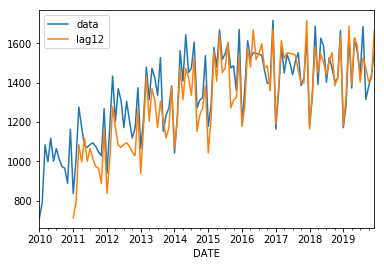

In [73]:
display(df1.plot())
df1.head(20)

In [74]:
df1 = df1.dropna()

In [75]:
trend=np.arange(1, len(df1)+1)
trend2=np.square(trend)

In [76]:
df1['trend']=trend
df1['trend2']=trend2

In [77]:
display(df1.head())
df1.tail()

,data,lag12,trend,trend2
DATE,,,,
2011-01-01,836.366,712.469,1,1
2011-02-01,1007.082,793.362,2,4
2011-03-01,1276.843,1083.953,3,9
2011-04-01,1173.520,997.334,4,16
2011-05-01,1081.272,1117.570,5,25


,data,lag12,trend,trend2
DATE,,,,
2019-08-01,1685.339,1527.416,104,10816
2019-09-01,1315.678,1474.997,105,11025
2019-10-01,1380.174,1405.908,106,11236
2019-11-01,1438.444,1422.219,107,11449
2019-12-01,1558.430,1665.906,108,11664


In [79]:
train=h2o.H2OFrame(df1.iloc[:96])
test=h2o.H2OFrame(df1.iloc[96:])

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [80]:
x=['lag12', 'trend', 'trend2']
y='data'

In [81]:
from h2o.estimators import H2ORandomForestEstimator

In [83]:
model = H2ORandomForestEstimator(ntrees=100, max_depth=20, nfolds=5)

In [84]:
model.train(x=x, y=y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [85]:
performance = model.model_performance(test_data=test)
performance


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 13725.04654962009
RMSE: 117.15394380736865
MAE: 93.87831837972004
RMSLE: 0.08291513989527903
Mean Residual Deviance: 13725.04654962009
